In [236]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [20]:
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [169]:
### to store the data
df = adult['data']['features']

### to store the targets
target = adult['data']['targets']

In [170]:
df = pd.concat([df, target], axis=1)

In [171]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [172]:
df.shape

(48842, 15)

In [173]:
df_quant = df.describe()

In [174]:
df_quant

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48568.000000,4.856800e+04,48568.000000,48568.000000,48568.000000,48568.000000
mean,38.642295,1.896385e+05,10.073608,1075.908726,87.741414,40.424704
std,13.714365,1.056425e+05,2.568636,7430.021192,403.581741,12.391966
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175085e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781570e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.375868e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Find & Impute null values

In [175]:
df.isnull().sum()

age                274
workclass         1218
fnlwgt             274
education          274
education-num      274
marital-status     274
occupation        1221
relationship       274
race               274
sex                274
capital-gain       274
capital-loss       274
hours-per-week     274
native-country     274
income               0
dtype: int64

In [203]:
rows_to_drop = df[df['income'].notnull() & df.drop(columns=['income']).isnull().all(axis=1)].index

In [205]:
rows_to_drop

Int64Index([32580, 32626, 32644, 32749, 32814, 32866, 32890, 32964, 32981,
            33032,
            ...
            47910, 47957, 47981, 48041, 48154, 48245, 48272, 48604, 48651,
            48826],
           dtype='int64', length=274)

In [219]:
df = df.drop(rows_to_drop)

In [220]:
df.isnull().sum()

age                 0
workclass         944
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        947
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
dtype: int64

In [225]:
df[(df['workclass'].isnull()==True) & (df['occupation'].isnull()==True)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
32567,29.0,NaN,227026.0,HS-grad,9.0,Never-married,NaN,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
32574,58.0,NaN,299831.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K.
32583,72.0,NaN,132015.0,7th-8th,4.0,Divorced,NaN,Not-in-family,White,Female,0.0,0.0,6.0,United-States,<=50K.
32596,65.0,NaN,191846.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61.0,NaN,265201.0,Some-college,10.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,14.0,United-States,<=50K.
48769,21.0,NaN,212661.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
48800,73.0,NaN,144872.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,25.0,Canada,<=50K.
48812,81.0,NaN,26711.0,Assoc-voc,11.0,Married-civ-spouse,NaN,Husband,White,Male,2936.0,0.0,20.0,United-States,<=50K.


In [281]:
df['income'].value_counts()

<=50K    36955
>50K     11613
Name: income, dtype: int64

## Replace income value


In [282]:
df['income'] = df['income'].str.replace('<=50K.', '<=50K')
df['income'] = df['income'].str.replace('>50K.', '>50K')

C:\Users\rcc\AppData\Local\Temp\ipykernel_10732\2778636871.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['income'] = df['income'].str.replace('<=50K.', '<=50K')
C:\Users\rcc\AppData\Local\Temp\ipykernel_10732\2778636871.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['income'] = df['income'].str.replace('>50K.', '>50K')


In [280]:
df['income'].value_counts()

<=50K    36955
>50K     11613
Name: income, dtype: int64

In [292]:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

In [293]:
df.shape

(48568, 15)

In [298]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [299]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [300]:
df.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [301]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [302]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [303]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [304]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
corr_matrix = df.corr()

C:\Users\rcc\AppData\Local\Temp\ipykernel_10732\3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


C:\Users\rcc\AppData\Local\Temp\ipykernel_10732\3708149406.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)


<Axes: >

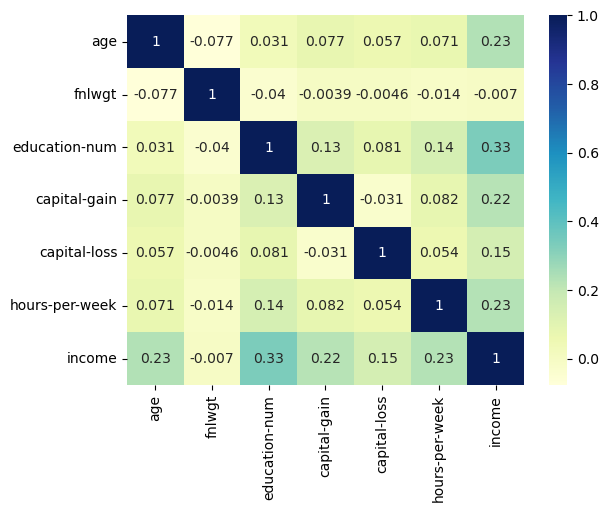

In [308]:
# plt.imshow(corr_matrix,cmap="YlGnBu")
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
# plt.colorbar()
# plt.show()
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

### Here income have positive relation with education-num, age, capital-gain, and hours-per-week

In [309]:
x = df['race']
y = df['capital-gain']

Text(0.5, 0, 'Race')

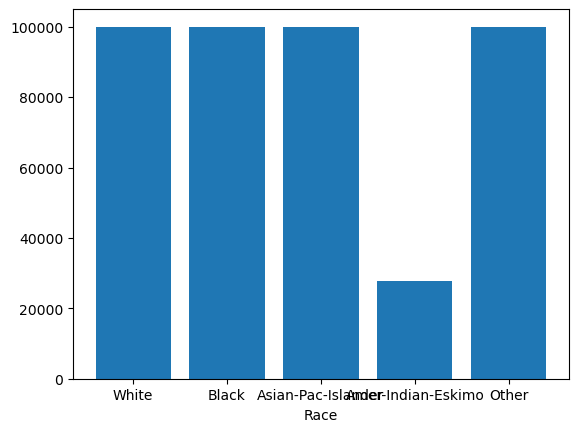

In [310]:
plt.bar(x, y)
plt.xlabel("Race")

In [311]:
x = df['education-num']
y = df['capital-gain']

<BarContainer object of 48568 artists>

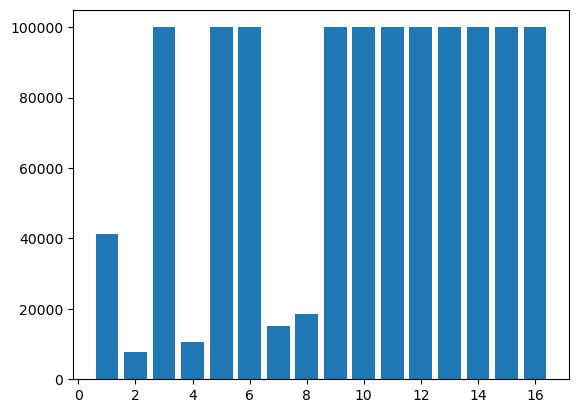

In [312]:
plt.bar(x, y)

In [313]:
x = df['hours-per-week']
y = df['capital-gain']

<BarContainer object of 48568 artists>

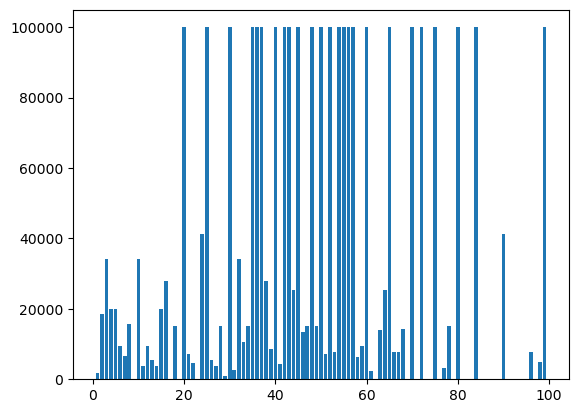

In [314]:
plt.bar(x, y)

In [315]:
df['capital-gain'].max()

99999.0

In [316]:
df_capital_gain_8000 = df[df['capital-gain']>80000]

In [317]:
df_capital_gain_8000

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1246,54.0,Self-emp-inc,166459.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,1
1368,52.0,Private,152234.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999.0,0.0,40.0,Japan,1
1482,53.0,Self-emp-inc,263925.0,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,99999.0,0.0,40.0,United-States,1
1528,52.0,Private,118025.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,1
1616,46.0,Private,370119.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,32.0,Self-emp-inc,225053.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,60.0,United-States,1
48582,61.0,Self-emp-not-inc,151369.0,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,30.0,United-States,1
48591,36.0,Private,224566.0,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Male,99999.0,0.0,45.0,United-States,1
48598,42.0,Private,32878.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,42.0,United-States,1


In [318]:
df_capital_gain_8000[df_capital_gain_8000['education-num']<=5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27077,55.0,Private,408537.0,9th,5.0,Divorced,Craft-repair,Unmarried,White,Female,99999.0,0.0,37.0,United-States,1
43018,59.0,Self-emp-inc,76860.0,5th-6th,3.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999.0,0.0,40.0,China,1


In [319]:
df_india_capital_gain  = df[df['native-country'] == 'India']

In [320]:
df_india_capital_gain['capital-gain'].mean()

3196.390728476821

In [321]:
x = df_india_capital_gain['education']
y = df_india_capital_gain['capital-gain']

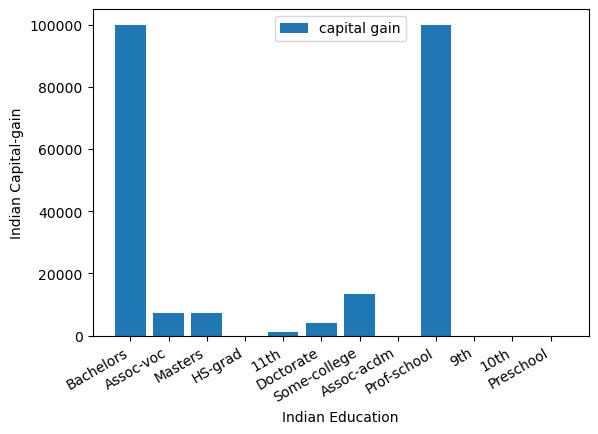

In [322]:
plt.bar(x, y, label="capital gain")
plt.xlabel("Indian Education")
plt.ylabel("Indian Capital-gain")
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [323]:
df[df['capital-gain']>20]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
8,31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1
59,30.0,Private,188146.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013.0,0.0,40.0,United-States,0
60,30.0,Private,59496.0,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,2407.0,0.0,40.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,32.0,Private,24529.0,Assoc-voc,11.0,Married-civ-spouse,Sales,Husband,White,Male,5178.0,0.0,60.0,United-States,1
48812,81.0,NaN,26711.0,Assoc-voc,11.0,Married-civ-spouse,NaN,Husband,White,Male,2936.0,0.0,20.0,United-States,0
48813,60.0,Private,117909.0,Assoc-voc,11.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688.0,0.0,40.0,United-States,1
48822,40.0,Private,202168.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024.0,0.0,55.0,United-States,1
